In [1]:
import numpy as np
import pandas as pd
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report

In [2]:
dt_train = pd.read_csv(r'propaganda_train.tsv',sep = '\t')
dt_test = pd.read_csv(r'propaganda_train.tsv',sep = '\t')


In [3]:
dt_train.head()

,label,tagged_in_context
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed."
1,not_propaganda,This declassification effort <BOS> won’t make ...
2,flag_waving,The Obama administration misled the <BOS> Amer...
3,not_propaganda,“It looks like we’re capturing the demise of t...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>"


In [4]:
dt_train.rename(columns = {'tagged_in_context':'data'}, inplace = True)

In [5]:
dt_train.head()

,label,data
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed."
1,not_propaganda,This declassification effort <BOS> won’t make ...
2,flag_waving,The Obama administration misled the <BOS> Amer...
3,not_propaganda,“It looks like we’re capturing the demise of t...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>"


In [6]:
from copy import copy
dt = dt_train.copy()

In [7]:
dt.shape

(2414, 2)

In [8]:
dt.describe()

,label,data
count,2414,2414
unique,9,2402
top,not_propaganda,<BOS> Impossible <EOS>.
freq,1191,2


In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2414 entries, 0 to 2413
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2414 non-null   object
 1   data    2414 non-null   object
dtypes: object(2)
memory usage: 37.8+ KB


In [10]:
dt.dtypes

label    object
data     object
dtype: object

In [11]:
dt['label'].value_counts()

not_propaganda               1191
exaggeration,minimisation     164
causal_oversimplification     158
name_calling,labeling         157
loaded_language               154
appeal_to_fear_prejudice      151
flag_waving                   148
repetition                    147
doubt                         144
Name: label, dtype: int64

In [12]:
dt['target'] = dt['label'] == 'not_propaganda'

In [13]:
dt.drop(['label'],axis=1)

,data,target
0,"No, <BOS> he <EOS> will not be confirmed.",True
1,This declassification effort <BOS> won’t make ...,True
2,The Obama administration misled the <BOS> Amer...,False
3,“It looks like we’re capturing the demise of t...,True
4,"<BOS> Location: Westerville, Ohio <EOS>",True
...,...,...
2409,<BOS> We support and appreciate <EOS> your bus...,True
2410,International Atomic Energy Agency (IAEA) Dire...,True
2411,What has been done: there has been work on for...,True
2412,This is <BOS> the law of gradualness not the g...,True


In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dt['target'] = le.fit_transform(dt['target'])

In [15]:
dt.drop(['label'],axis=1,inplace = True)

In [16]:
dt.head()

,data,target
0,"No, <BOS> he <EOS> will not be confirmed.",1
1,This declassification effort <BOS> won’t make ...,1
2,The Obama administration misled the <BOS> Amer...,0
3,“It looks like we’re capturing the demise of t...,1
4,"<BOS> Location: Westerville, Ohio <EOS>",1


In [18]:
dt_ = dt.drop_duplicates(subset=["data"], keep="first")

In [19]:
print(dt.shape)
print(dt_.shape)

(2414, 2)
(2402, 2)


<AxesSubplot:>

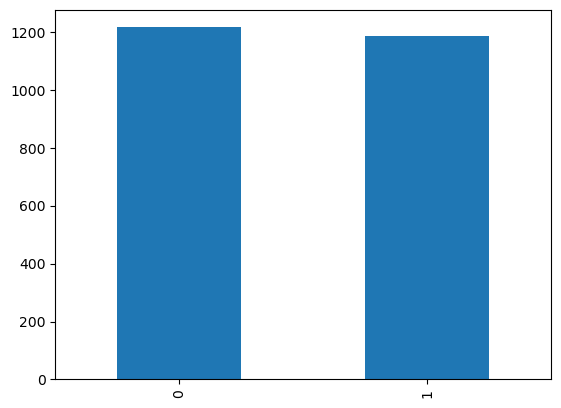

In [20]:
dt_["target"].value_counts().plot(kind="bar")

In [22]:
# Define the neural network model
model = Sequential()

model.add(Embedding(10000, 100, input_length=max_len))
model.add(Conv1D(16, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.4))
model.add(LSTM(16))
model.add(Dropout(0.3))
model.add(Dense(1, activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 conv1d (Conv1D)             (None, 198, 16)           4816      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 16)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 16)            0         
                                                                 
 lstm (LSTM)                 (None, 16)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                        

In [24]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='max')
from livelossplot.inputs.keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

In [25]:
# Train the model
history = model.fit(train_data, train_labels, epochs = 20, batch_size = 128, validation_split = 0.2,callbacks = [early_stop])

Epoch 1/20
16/16 [==============================] - 6s 160ms/step - loss: 0.6904 - val_loss: 0.6878
Epoch 2/20
16/16 [==============================] - 2s 112ms/step - loss: 0.6745 - val_loss: 0.6675
Epoch 3/20
16/16 [==============================] - 2s 102ms/step - loss: 0.6355 - val_loss: 0.6411
Epoch 4/20
16/16 [==============================] - 2s 96ms/step - loss: 0.5700 - val_loss: 0.6184
Epoch 5/20
16/16 [==============================] - 2s 97ms/step - loss: 0.4620 - val_loss: 0.5868
Epoch 6/20
16/16 [==============================] - 2s 97ms/step - loss: 0.3195 - val_loss: 0.5621
Epoch 7/20
16/16 [==============================] - 2s 97ms/step - loss: 0.2252 - val_loss: 0.5890
Epoch 8/20
16/16 [==============================] - 2s 110ms/step - loss: 0.1442 - val_loss: 0.6635
Epoch 9/20
16/16 [==============================] - 2s 101ms/step - loss: 0.0954 - val_loss: 0.7209
Epoch 10/20
16/16 [==============================] - 2s 99ms/step - loss: 0.0713 - val_loss: 0.8116
Epoc

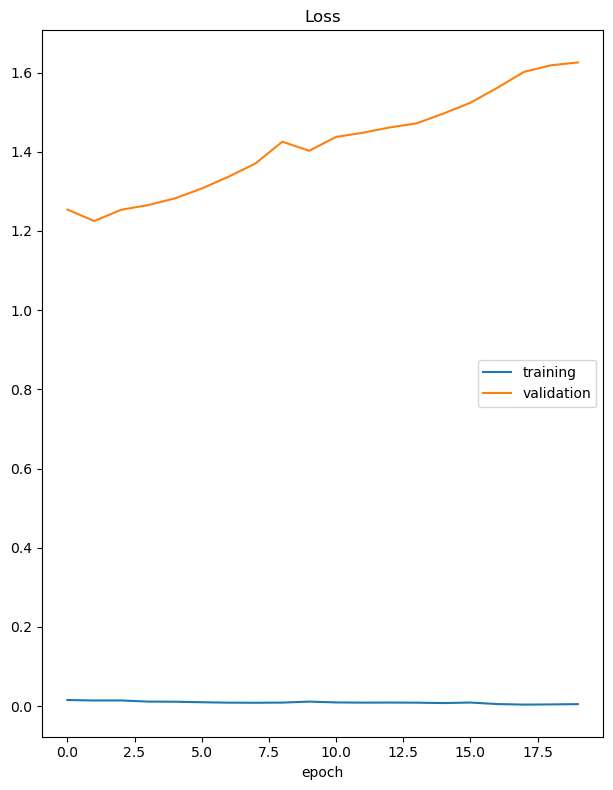

Loss
	training         	 (min:    0.004, max:    0.015, cur:    0.005)
	validation       	 (min:    1.225, max:    1.626, cur:    1.626)
16/16 [==============================] - 2s 154ms/step - loss: 0.0049 - val_loss: 1.6255


In [26]:
# Train the model
history = model.fit(train_data, train_labels, epochs = 20, batch_size = 128, validation_split = 0.2,callbacks = [plot_loss_1])